In [ ]:
!nvidia-smi

Mon May 31 11:52:20 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install kaggle --upgrade

Requirement already up-to-date: kaggle in /usr/local/lib/python3.7/dist-packages (1.5.12)


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"romanregmi","key":"bb30e629c8a07c637168afee551dd552"}'}

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 99% 2.27G/2.29G [00:28<00:00, 124MB/s]
100% 2.29G/2.29G [00:28<00:00, 86.2MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/chest-xray-pneumonia.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!rm chest-xray-pneumonia.zip
!rm -r ./chest_xray/chest_xray/

In [ ]:
from fastai.vision import*

In [ ]:
data_path = Path('/content/chest_xray').absolute()
model_path = Path('./model').absolute()


In [ ]:
# since the data is already split into train and test. 
# we will not use the valid_pct
# instead we will use the name of the folder that contains the validation set
# you can use the test folder or the val folder
data = ImageDataBunch.from_folder(data_path,valid='test',size=256,
                                  ds_tfms = get_transforms()).normalize(imagenet_stats)

In [ ]:
print(data.classes)
print(len(data.train_ds))
print(len(data.valid_ds))

['NORMAL', 'PNEUMONIA']
5216
624


Since the validation set is very low, we will instead use 20% of the training dataset to validate the model.

In [ ]:
data = ImageDataBunch.from_folder(data_path,valid_pct=0.2,size=256,
                                  ds_tfms = get_transforms()).normalize(imagenet_stats)

In [ ]:
print(data.classes)
print(len(data.train_ds))
print(len(data.valid_ds))

['NORMAL', 'PNEUMONIA']
4685
1171


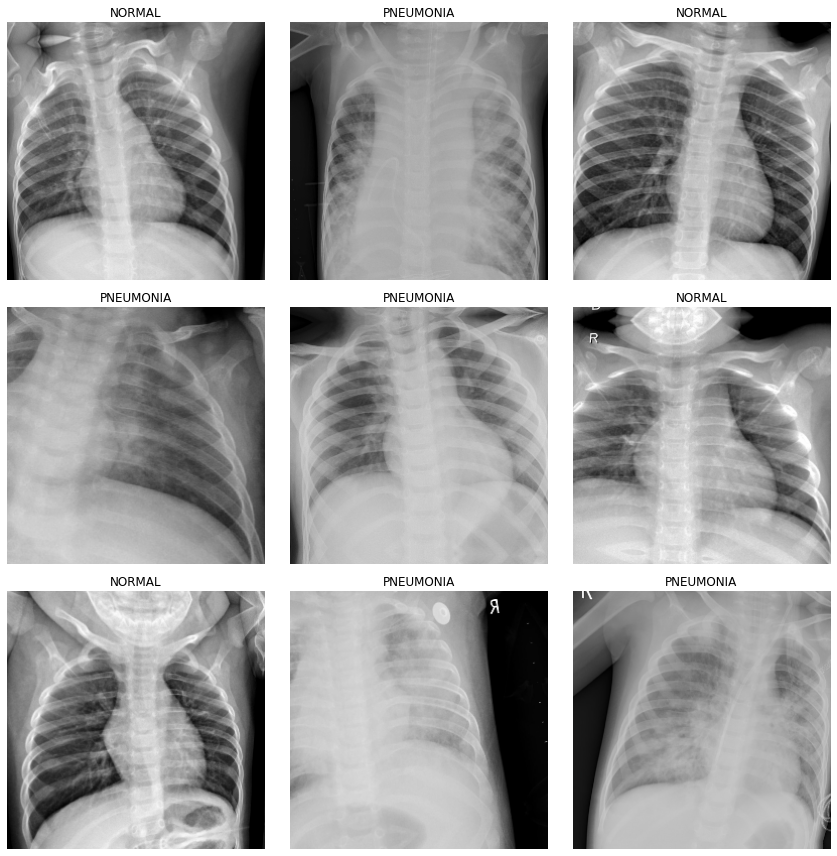

In [ ]:
data.show_batch(rows=3)

In [ ]:
learn = cnn_learner(data, models.resnet50,
                    metrics=error_rate, model_dir=model_path)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [ ]:
print("The 50 in resnet50 refers to the number of layers in this variant of the architecture (other options are 18, 34, 101, and 152). Models using architectures with more layers take longer to train, and are more prone to overfitting (i.e. you can't train them for as many epochs before the accuracy on the validation set starts getting worse). On the other hand, when using more data, they can be quite a bit more accurate.")

The 50 in resnet50 refers to the number of layers in this variant of the architecture (other options are 18, 34, 101, and 152). Models using architectures with more layers take longer to train, and are more prone to overfitting (i.e. you can't train them for as many epochs before the accuracy on the validation set starts getting worse). On the other hand, when using more data, they can be quite a bit more accurate.


In [ ]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.475703,0.352448,0.083689,03:57
1,0.273542,0.208414,0.070880,03:57
2,0.188724,0.163950,0.056362,03:55
3,0.157246,0.125223,0.049530,03:57
4,0.143409,0.132318,0.050384,03:57


In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


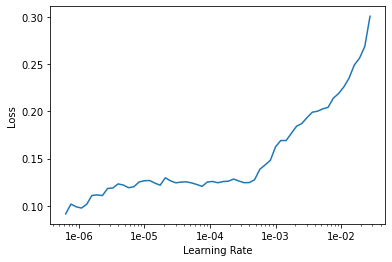

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5, max_lr=1e-04) # retrain the model 
# use the max learning rate such that the for the values below it, it gives minimum loss

epoch,train_loss,valid_loss,error_rate,time
0,0.120363,0.115968,0.040137,04:00
1,0.125182,0.101541,0.036721,03:56
2,0.109793,0.146149,0.046114,04:01
3,0.081612,0.075294,0.028181,03:59
4,0.064619,0.086571,0.028181,03:58


In [ ]:
learn.export(model_path /'pneumonia.pkl')
# learn.save(model_path /'pneumonia')
